In [1]:
import numpy as np
import uproot
import pandas as pd
import matplotlib.pyplot as plt
#import plotly
plt.style.use(['science','no-latex'])
#plt.style.available

In [2]:
genie_syst_tree = uproot.open('/sbnd/app/users/brindenc/mysbn/srcs/sbnana/sbnana/CAFAna/test/test_ensemble_genie_systs.root:systs;1')
genie_syst = genie_syst_tree.arrays(library='pd')

flux_syst_tree = uproot.open('/sbnd/app/users/brindenc/mysbn/srcs/sbnana/sbnana/CAFAna/test/test_ensemble_flux_systs.root:systs;1')
flux_syst = flux_syst_tree.arrays(library='pd')

In [3]:
genie_syst.loc[:,'yerr_minus'] = (genie_syst.loc[:,'ynom']-genie_syst.loc[:,'y0'])/genie_syst.loc[:,'ynom']
genie_syst.loc[:,'yerr_plus'] = abs((genie_syst.loc[:,'ynom']-genie_syst.loc[:,'y1'])/genie_syst.loc[:,'ynom'])

flux_syst.loc[:,'yerr_minus'] = (flux_syst.loc[:,'ynom']-flux_syst.loc[:,'y0'])/flux_syst.loc[:,'ynom']
flux_syst.loc[:,'yerr_plus'] = abs((flux_syst.loc[:,'ynom']-flux_syst.loc[:,'y1'])/flux_syst.loc[:,'ynom'])

genie_syst = genie_syst.fillna(0)
flux_syst = flux_syst.fillna(0)

In [79]:
genie_syst.head(20)
flux_syst.head(20)

xnom        ynom          y0          y1   dx  yerr_minus  \
entry subentry                                                              
0     0        -0.05    0.000000    0.000000    0.000000  0.1    0.000000   
      1         0.05    0.000000    0.000000    0.000000  0.1    0.000000   
      2         0.15    0.000000    0.000000    0.000000  0.1    0.000000   
      3         0.25   12.485865   12.900965   17.928246  0.1   -0.033246   
      4         0.35   74.915192   70.323463   78.494553  0.1    0.061292   
      5         0.45   99.886917   99.951447  115.899078  0.1   -0.000646   
      6         0.55  249.717300  245.827408  280.724854  0.1    0.015577   
      7         0.65  274.689026  265.007050  299.834747  0.1    0.035247   
      8         0.75  162.316238  164.574921  187.514557  0.1   -0.013915   
      9         0.85  362.090088  343.133820  380.408936  0.1    0.052352   
      10        0.95  387.061798  383.612579  427.479797  0.1    0.008911   
      11        1.05  362.090088  357.643005  421.046936  0.1    0.012282   
      12        1.15  274.689026  264.615692  295.179138  0.1    0.036672   
      13        1.25  324.632477  299.727142  338.058014  0.1    0.076719   
      14        1.35  262.203156  245.495682  277.815613  0.1    0.063720   
      15        1.45  424.519409  390.433075  462.806183  0.1    0.080294   
      16        1.55  324.632477  304.941650  337.880249  0.1    0.060656   
      17        1.65  312.146606  291.189758  322.891144  0.1    0.067138   
      18        1.75  287.174896  262.544891  298.053619  0.1    0.085767   
      19        1.85  324.632477  301.747803  340.499329  0.1    0.070494   

                yerr_plus  
entry subentry             
0     0          0.000000  
      1          0.000000  
      2          0.000000  
      3          0.435883  
      4          0.047779  
      5          0.160303  
      6          0.124171  
      7          0.091543  
      8          0.155242  
      9          0.050592  
      10         0.104423  
      11         0.162824  
      12         0.074594  
      13         0.041356  
      14         0.059543  
      15         0.090189  
      16         0.040809  
      17         0.034421  
      18         0.037882  
      19         0.048876

<AxesSubplot:xlabel='xnom'>

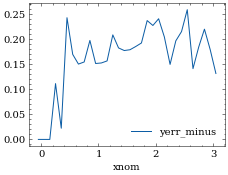

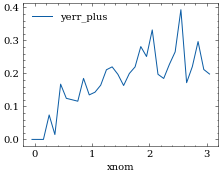

In [5]:
genie_syst.plot('xnom','yerr_minus')
genie_syst.plot('xnom','yerr_plus')

$x=1$

In [44]:
def set_style(ax):
  ax.tick_params(axis='x', labelsize=20)
  ax.tick_params(axis='y', labelsize=20)

In [83]:
from datetime import date

day = date.today().strftime("%Y_%m_%d")
day

'2023_01_17'

In [88]:
np.arctan(200/110e2)*180/np.pi

1.041626676009974

Text(0.5, 1.0, 'Fractional Systematic Uncertainties')

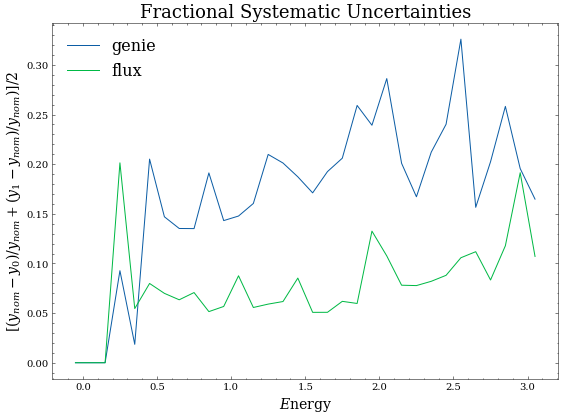

In [6]:
x = genie_syst.loc[:,'xnom'].values

y_label = 'yerr_minus'
y = genie_syst.loc[:,y_label].values
y2 = flux_syst.loc[:,y_label].values

y1_label = 'yerr_plus'
y1 = genie_syst.loc[:,y1_label].values
y3 = flux_syst.loc[:,y1_label].values
fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)
#plt.rcParams['text.usetex'] = True

ax.plot(x,(y+y1)/2,label='genie')
#plt.plot(x,y1,label=y1_label+' genie')
#plt.plot(x,y2,label=y_label+' flux')
#ax.bar(x,(y2+y3)/2,label='flux',linewidth=3,alpha=1,edgecolor='blue')
ax.plot(x,(y2+y3)/2,label='flux')
ax.legend(fontsize=16)
ax.set_xlabel('$E$nergy',fontsize=14)
ax.set_ylabel('$[(y_{nom}-y_0)/y_{nom}+(y_1-y_{nom})/y_{nom})]/2$',fontsize=14)
ax.set_title('Fractional Systematic Uncertainties',fontsize=18)

Text(0.5, 1.0, 'Interaction Uncertainties')

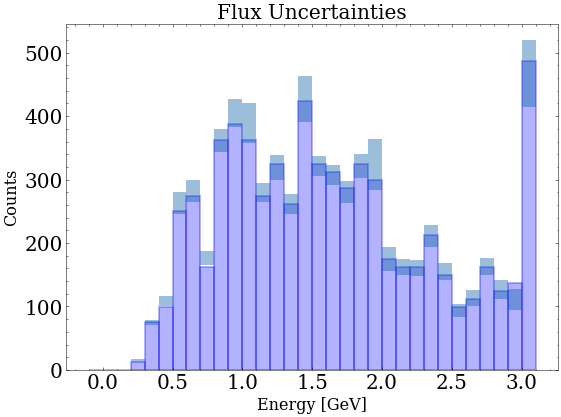

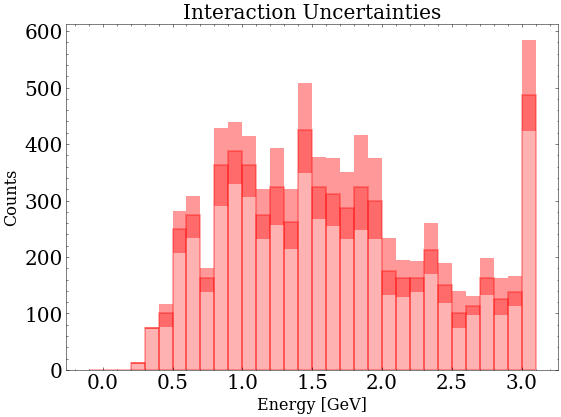

In [82]:
#Error bar hist
x = genie_syst.loc[:,'xnom']
dx = genie_syst.loc[:,'dx'].values[0]

y_syst = genie_syst.loc[:,'ynom']
y_flux = flux_syst.loc[:,'ynom']

y0_syst = genie_syst.loc[:,'y0']
y0_flux = flux_syst.loc[:,'y0']

y1_syst = genie_syst.loc[:,'y1']
y1_flux = flux_syst.loc[:,'y1']

yerrs_syst = [y1_syst,y0_syst]
yerrs_flux = [y1_flux,y0_flux]

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)

ax.bar(x,y_flux,width=dx,color='blue',alpha=0.3,edgecolor='blue',linewidth=2)
ax.bar(x,height=y1_flux-y0_flux,width=dx,bottom=y0_flux,alpha=0.4)
ax.set_ylim([0,None])
ax.set_xlabel('Energy [GeV]',fontsize=16)
ax.set_ylabel('Counts',fontsize=16)
set_style(ax)
ax.set_title('Flux Uncertainties',fontsize=20)

fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True)

ax.bar(x,y_syst,width=dx,color='red',alpha=0.3,edgecolor='red',linewidth=2)
ax.bar(x,height=y1_syst-y0_syst,width=dx,bottom=y0_syst,alpha=0.4,color='red')
ax.set_ylim([0,None])
ax.set_xlabel('Energy [GeV]',fontsize=16)
ax.set_ylabel('Counts',fontsize=16)
set_style(ax)
ax.set_title('Interaction Uncertainties',fontsize=20)

In [76]:
y_flux-y0_flux

entry  subentry
0      0            0.000000
       1            0.000000
       2            0.000000
       3           -0.415100
       4            4.591728
       5           -0.064529
       6            3.889893
       7            9.681976
       8           -2.258682
       9           18.956268
       10           3.449219
       11           4.447083
       12          10.073334
       13          24.905334
       14          16.707474
       15          34.086334
       16          19.690826
       17          20.956848
       18          24.630005
       19          22.884674
       20          15.314301
       21          18.909576
       22          13.148224
       23          14.321136
       24          18.688873
       25           7.948944
       26          16.634590
       27          11.280785
       28          12.363235
       29          12.848969
       30          42.923218
       31          71.919098
dtype: float32

<BarContainer object of 4 artists>

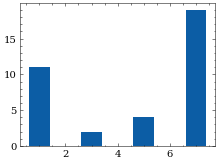

In [38]:
a = [1, 3, 5, 7]
b = [11, 2, 4, 19]
  
plt.bar(a, b)

In [39]:
dx

0.1